In [1]:
# Firstly we import our dataset files
import pandas as pd
import os
import glob

def read_csv_files_from_folder(folder_path):
    """
    Reads all CSV files from a specified folder and merges them into a single DataFrame.

    Parameters:
    folder_path (str): The path to the folder containing CSV files.

    Returns:
    pd.DataFrame: A Pandas DataFrame containing the merged data or None if no data is found.
    """
    try:
        # Create an empty list to store DataFrames
        dfs = []

        # Use glob to get a list of all CSV files in the folder
        csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

        if not csv_files:
            print("No CSV files found in the specified folder.")
            return None

        # Read and append each CSV file to the list
        for csv_file in csv_files:
            df = pd.read_csv(csv_file)
            if not df.empty:
                dfs.append(df)

        if not dfs:
            print("No valid data found in the CSV files.")
            return None

        # Concatenate all DataFrames vertically
        merged_df = pd.concat(dfs, ignore_index=True)

        return merged_df
    except FileNotFoundError:
        print("The specified folder or CSV files were not found.")
        return None
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [2]:
import os

# Print the current working directory
print("Current Working Directory:", os.getcwd())

# If needed, adjust the folder path here
folder_path = "Data"

# Check if the folder exists
if not os.path.exists(folder_path):
    print(f"The folder {folder_path} does not exist.")
else:
    print(f"The folder {folder_path} exists.")

    # List files in the folder to verify
    files_in_folder = os.listdir(folder_path)
    print("Files in folder:", files_in_folder)


Current Working Directory: C:\Users\nklea\Documents\Book\Chapter4
The folder Data exists.
Files in folder: ['._G1.csv', 'G1.csv', 'G2.csv', 'G3.csv', 'G4.csv', 'S1.csv', 'S2.csv']


In [3]:
# Reading the dataset using our custom function
df = read_csv_files_from_folder("Data")

# Take a look at the first 5 rows of the dataset
df.head()

,label,animal_ID,segment_ID,timestamp_ms,ax,ay,az,axhg,ayhg,azhg,cx,cy,cz,gx,gy,gz,pressure,temp
0,walking,G1,1,1,1.57538,4.34787,-9.27514,5.61615,8.19897,10.21120,-0.5685,-0.7875,2.5245,10.54880,-28.4756,91.9512,NaN,28.16
1,walking,G1,1,6,1.47962,4.30477,-9.31105,4.98546,8.64947,4.47490,NaN,NaN,NaN,9.51220,-27.0732,88.1707,NaN,28.15
2,walking,G1,1,11,1.36469,4.24492,-9.42118,5.19569,9.25012,5.79634,-0.5850,-0.7830,2.5260,9.57317,-25.2439,83.9634,NaN,28.16
3,walking,G1,1,16,1.21386,4.22816,-9.59835,4.23463,8.82966,9.28016,NaN,NaN,NaN,11.21950,-22.9878,79.2683,NaN,28.16
4,walking,G1,1,21,1.07021,4.29520,-9.67257,5.13562,7.89864,5.88644,-0.5835,-0.7815,2.5215,13.47560,-19.8780,73.8415,NaN,28.14


In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize

# Selecting only the required columns
selected_data = df[['ax', 'ay', 'az', 'label']]
selected_data.head()

,ax,ay,az,label
0,1.57538,4.34787,-9.27514,walking
1,1.47962,4.30477,-9.31105,walking
2,1.36469,4.24492,-9.42118,walking
3,1.21386,4.22816,-9.59835,walking
4,1.07021,4.29520,-9.67257,walking


In [5]:
# 1. Low-pass filtering
from scipy.signal import butter, filtfilt

def apply_low_pass_filter(data, cutoff_frequency, sampling_rate, order=5):
    nyquist = 0.5 * sampling_rate
    normal_cutoff = cutoff_frequency / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

# Applying the filter (example parameters)
cutoff_freq = 10  # Cutoff frequency in Hz
sampling_rate = 200  # Sampling rate in Hz
filtered_data_lpf = apply_low_pass_filter(selected_data['ax'], cutoff_freq, sampling_rate)

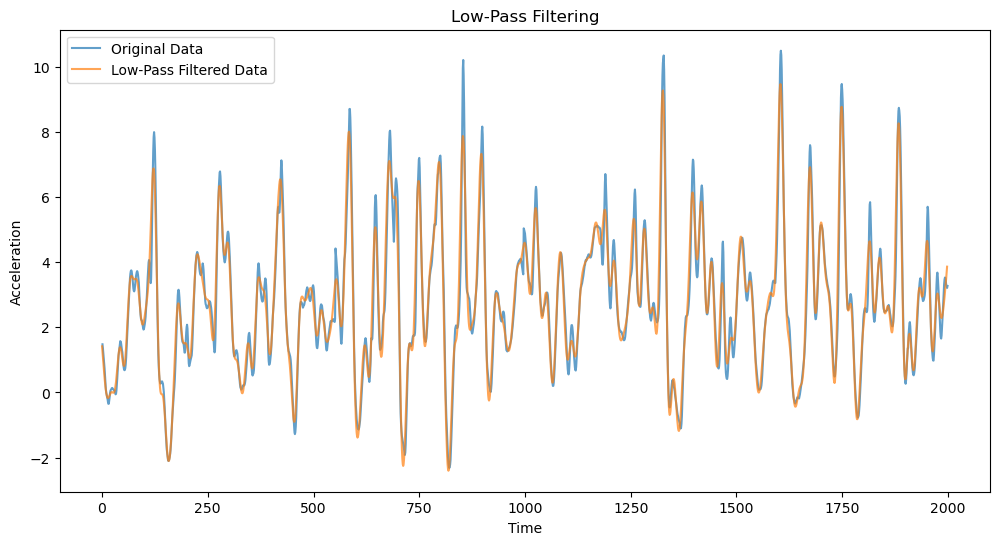

In [6]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12, 6))
plt.plot(selected_data['ax'][1:2000], label='Original Data', alpha=0.7)
plt.plot(filtered_data_lpf[1:2000], label='Low-Pass Filtered Data', alpha=0.7)
plt.title("Low-Pass Filtering")
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.legend()
plt.savefig('lpf_example.png', dpi=300)
plt.show()


In [7]:
# 2. High-pass filter
def apply_high_pass_filter(data, cutoff_frequency, sampling_rate, order=5):
    nyquist = 0.5 * sampling_rate
    normal_cutoff = cutoff_frequency / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return filtfilt(b, a, data)

# Applying the filter
cutoff_freq = 0.5  # Cutoff frequency in Hz
filtered_data_hpf = apply_high_pass_filter(selected_data['ax'], cutoff_freq, sampling_rate)


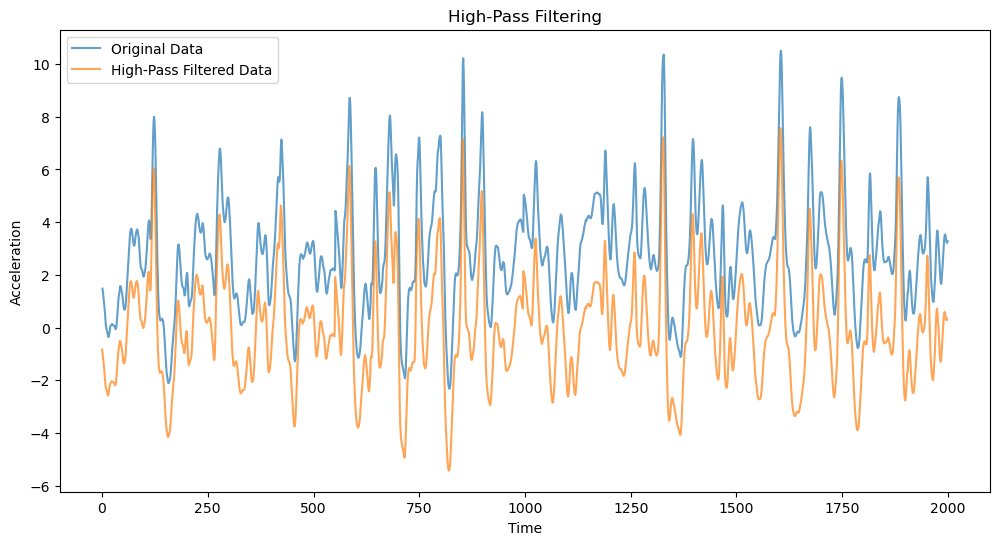

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(selected_data['ax'][1:2000], label='Original Data', alpha=0.7)
plt.plot(filtered_data_hpf[1:2000], label='High-Pass Filtered Data', alpha=0.7)
plt.title("High-Pass Filtering")
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.legend()
plt.savefig('hpf_example.png', dpi=300)
plt.show()


In [9]:
# 3. Band-pass filter
def apply_band_pass_filter(data, lowcut, highcut, sampling_rate, order=5):
    nyquist = 0.5 * sampling_rate
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band', analog=False)
    return filtfilt(b, a, data)

# Applying the filter
lowcut = 0.5  # Low cutoff frequency in Hz
highcut = 10  # High cutoff frequency in Hz
filtered_data_bpf = apply_band_pass_filter(selected_data['ax'], lowcut, highcut, sampling_rate)


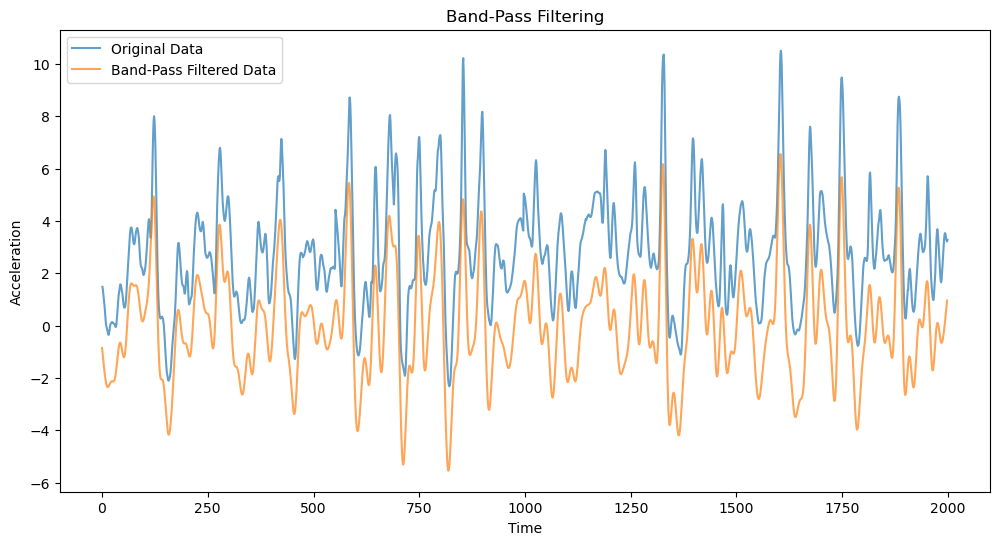

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(selected_data['ax'][1:2000], label='Original Data', alpha=0.7)
plt.plot(filtered_data_bpf[1:2000], label='Band-Pass Filtered Data', alpha=0.7)
plt.title("Band-Pass Filtering")
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.legend()
plt.savefig('bpf_example.png', dpi=300)
plt.show()

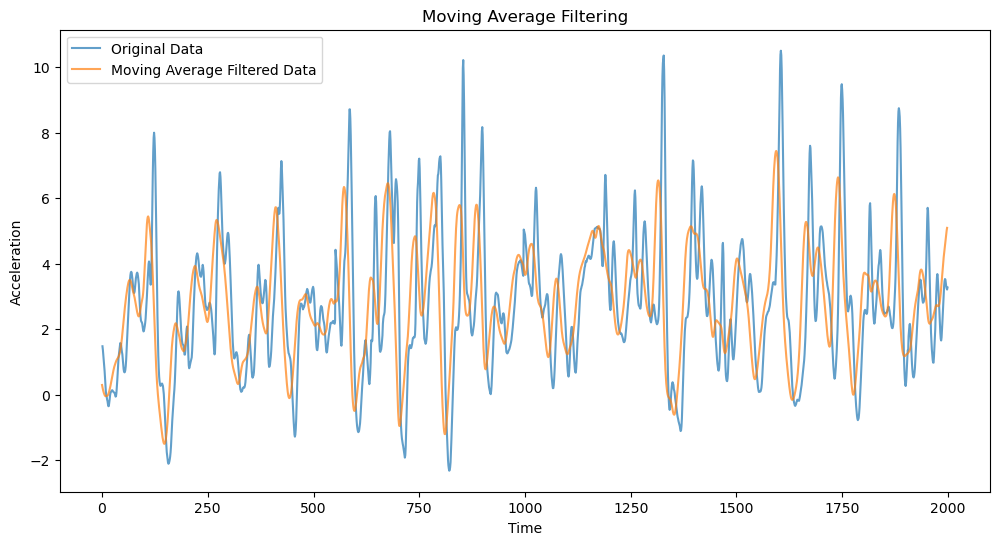

In [12]:
# 4. Moving average filter

import numpy as np
def apply_moving_average_filter(data, window_size=20):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

# Applying the filter
window_size = 20  # Number of samples to average over
filtered_data_maf = apply_moving_average_filter(selected_data['ax'], window_size)

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(selected_data['ax'][1:2000], label='Original Data', alpha=0.7)
plt.plot(filtered_data_maf[1:2000], label='Moving Average Filtered Data', alpha=0.7)
plt.title("Moving Average Filtering")
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.legend()
plt.savefig('maf_example.png', dpi=300)
plt.show()


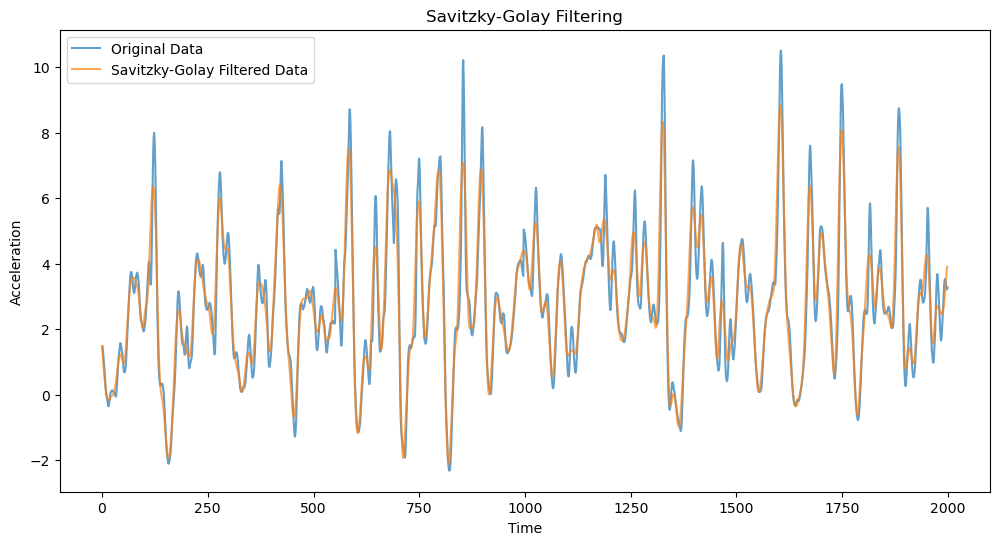

In [13]:
# 5. Savitzky golay filter
from scipy.signal import savgol_filter

def apply_savitzky_golay_filter(data, window_size=5, polynomial_order=2):
    return savgol_filter(data, window_size, polynomial_order)

# Applying the filter
window_size = 29  # Must be odd
polynomial_order = 2  # The order of the polynomial fit
filtered_data_sgf = apply_savitzky_golay_filter(selected_data['ax'], window_size, polynomial_order)

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(selected_data['ax'][1:2000], label='Original Data', alpha=0.7)
plt.plot(filtered_data_sgf[1:2000], label='Savitzky-Golay Filtered Data', alpha=0.7)
plt.title("Savitzky-Golay Filtering")
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.legend()
plt.savefig('Savitzky_example.png', dpi=300)
plt.show()


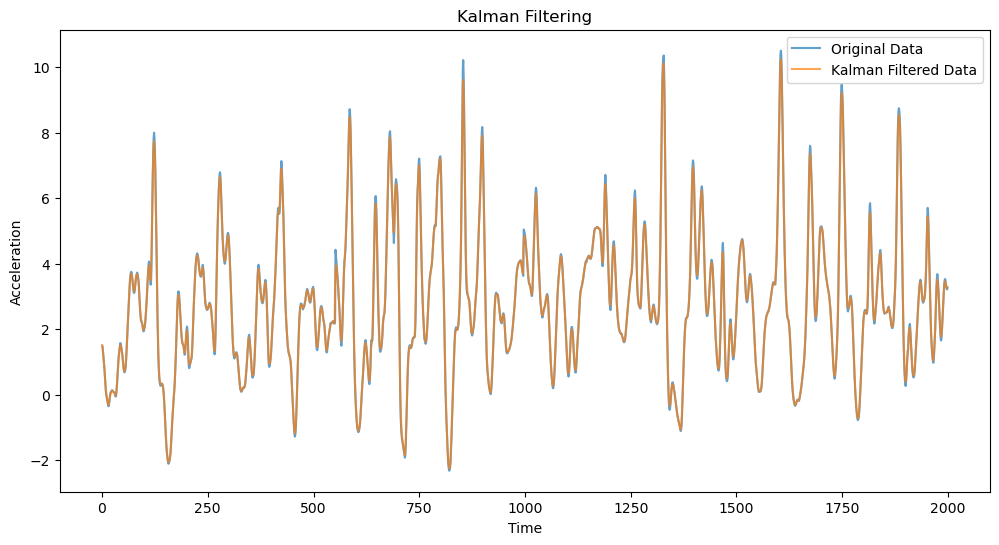

In [14]:
# Installing filterpy
#!pip install filterpy

# 6. Kalman filter

from filterpy.kalman import KalmanFilter
import numpy as np

def apply_kalman_filter(data, sampling_rate):
    # Initialize the Kalman Filter
    kf = KalmanFilter(dim_x=1, dim_z=1)

    # Define initial state and state transition matrix
    kf.x = np.array([0])  # initial state
    kf.F = np.array([[1]])  # state transition matrix

    # Define measurement function
    kf.H = np.array([[1]])

    # Define initial covariance matrix
    kf.P *= 1000

    # Define measurement noise (this might need to be adjusted)
    kf.R = np.array([[0.5]])  # Assuming 0.5 g^2 as measurement noise variance

    # Define process noise (also might need adjustment)
    process_noise_std = 0.5  # Assuming 0.5 g^2 as process noise variance
    kf.Q = np.array([[process_noise_std**2]])

    # Kalman Filter Operation
    filtered_data = []
    for measurement in data:
        kf.predict()
        kf.update(np.array([measurement]))
        filtered_data.append(kf.x[0])
    return np.array(filtered_data)

# Applying the filter to your accelerometer data 
filtered_data_kf = apply_kalman_filter(selected_data['ax'], 200)  # 200 Hz sampling rate


# Visualization
plt.figure(figsize=(12, 6))
plt.plot(selected_data['ax'][1:2000], label='Original Data', alpha=0.7)
plt.plot(filtered_data_kf[1:2000], label='Kalman Filtered Data', alpha=0.7)
plt.title("Kalman Filtering")
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.legend()
plt.savefig('kalman_example.png', dpi=300)
plt.show()

